In [1]:
# Medical Price Prediction

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
medical = pd.read_csv("C:\\Users\\91923\\Downloads\\Medical_insurance.csv") 
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical.shape

(2772, 7)

In [5]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
num_columns = list(medical.select_dtypes(['int64','float64']).columns)
cat_columns = list(medical.select_dtypes(['object']).columns)
print(num_columns,'\n',cat_columns)

['age', 'bmi', 'children', 'charges'] 
 ['sex', 'smoker', 'region']


In [7]:
Unique_column_values = [(i,len(medical[i].unique())) for i in medical.columns]
Unique_column_values

[('age', 47),
 ('sex', 2),
 ('bmi', 548),
 ('children', 6),
 ('smoker', 2),
 ('region', 4),
 ('charges', 1337)]

<AxesSubplot:>

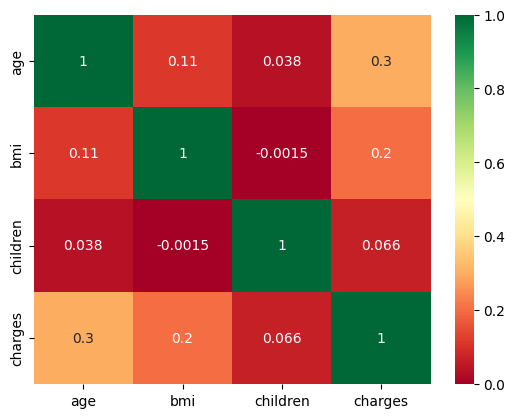

In [8]:
sns.heatmap(medical.corr(),cmap="RdYlGn",annot=True)

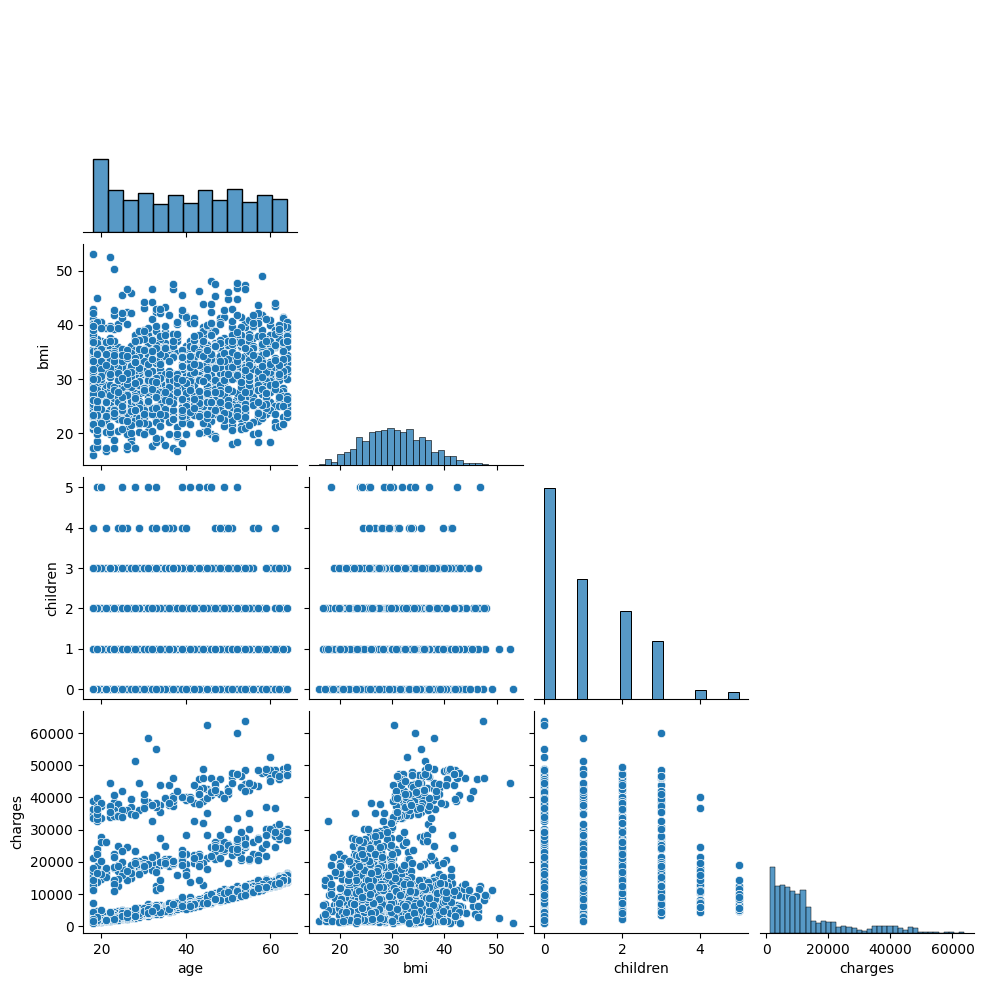

In [9]:
sns.pairplot(medical,corner=True)
plt.show()

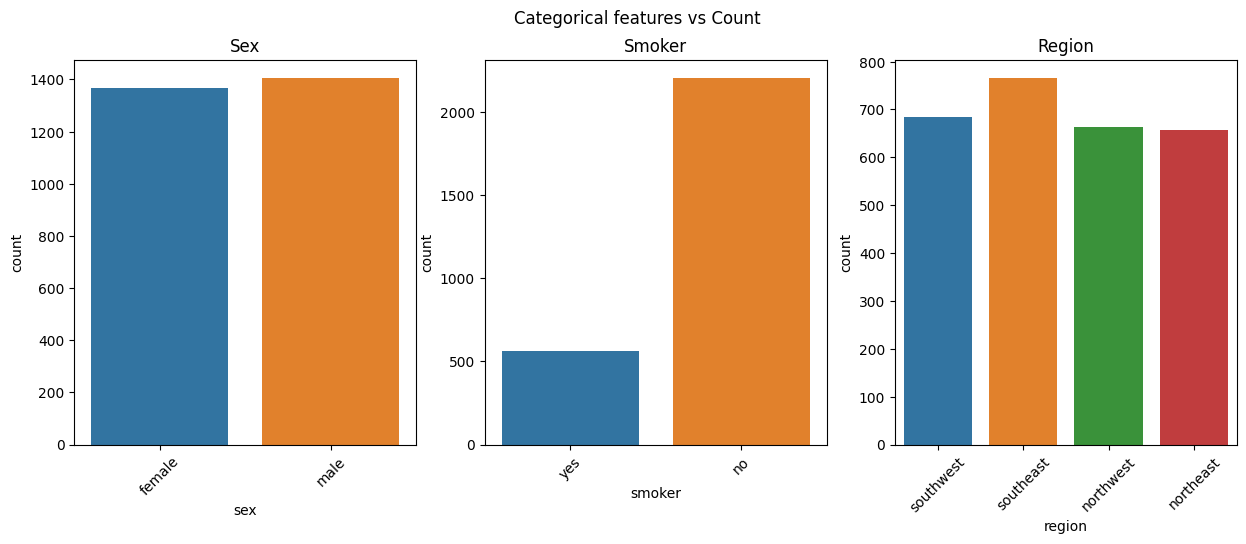

In [10]:
def plot(df):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Categorical features vs Count')

    # Sex
    sns.countplot(ax=axes[0], x="sex", data=medical)
    axes[0].set_title("Sex")
    axes[0].tick_params(axis='x', rotation=45)

    # Smoker
    sns.countplot(ax=axes[1], x="smoker", data=medical)
    axes[1].set_title("Smoker")
    axes[1].tick_params(axis='x', rotation=45)

    # Region
    sns.countplot(ax=axes[2], x="region", data=medical)
    axes[2].set_title("Region")
    axes[2].tick_params(axis='x', rotation=45)
plot(medical)

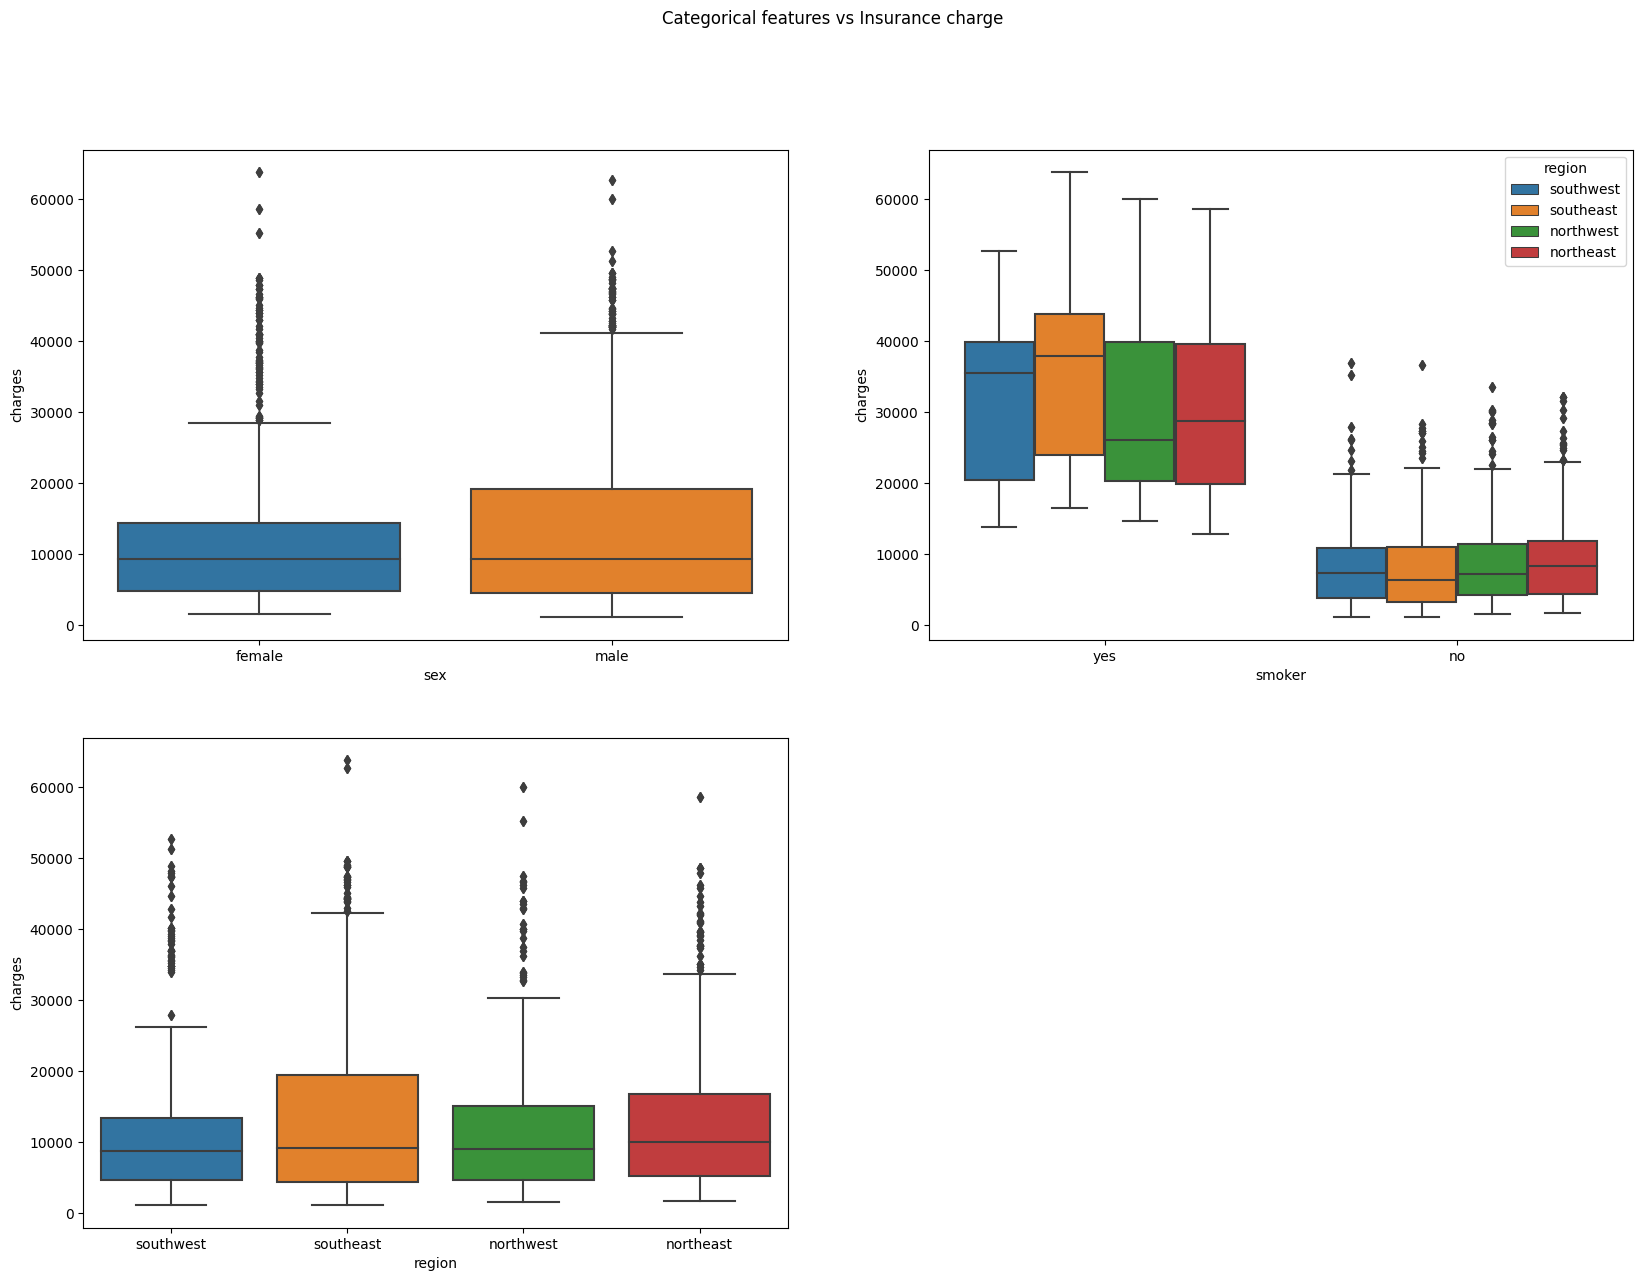

In [11]:
plt.figure(figsize=(20, 14))
plt.suptitle('Categorical features vs Insurance charge')
plt.subplot(2,2,1)
sns.boxplot(x = 'sex', y = 'charges', data = medical)
plt.subplot(2,2,2)
sns.boxplot(x = 'smoker', y = 'charges', hue='region', data = medical)
plt.subplot(2,2,3)
sns.boxplot(x = 'region', y = 'charges', data = medical)
plt.show()


In [12]:
medical_one_hot = pd.get_dummies(medical)
medical_one_hot


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,8569.86180,1,0,1,0,0,0,1,0
2768,21,34.600,0,2020.17700,1,0,1,0,0,0,0,1
2769,19,26.030,1,16450.89470,0,1,0,1,0,1,0,0
2770,23,18.715,0,21595.38229,0,1,1,0,0,1,0,0


In [13]:
X = medical_one_hot.drop("charges", axis=1)
y = medical_one_hot['charges']
print(X.shape,y.shape)

(2772, 11) (2772,)


In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)
print("Train percentage",len(X)*0.80," __ ","Test percentage",len(X)*.20)

(2217, 11) (555, 11)
Train percentage 2217.6  __  Test percentage 554.4


In [15]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"]
                        ) 
insurance_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
70/70 [==============================] - 1s 2ms/step - loss: 8209.5176 - mae: 8209.5176
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 7842.4800 - mae: 7842.4800
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 7772.6196 - mae: 7772.6196
Epoch 4/10
70/70 [==============================] - 0s 1ms/step - loss: 7757.8555 - mae: 7757.8555
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 7857.7969 - mae: 7857.7969
Epoch 6/10
70/70 [==============================] - 0s 1ms/step - loss: 7765.1455 - mae: 7765.1455
Epoch 7/10
70/70 [==============================] - 0s 1ms/step - loss: 7701.6357 - mae: 7701.6357
Epoch 8/10
70/70 [==============================] - 0s 1ms/step - loss: 7803.9556 - mae: 7803.9556
Epoch 9/10
70/70 [==============================] - 0s 2ms/step - loss: 7589.6060 - mae: 7589.6060
Epoch 10/10
70/70 [==============================] - 0s 1ms/step - loss: 7865.6553 - mae: 7865.6553


In [16]:
Evaluate_1 = insurance_model.evaluate(X_test,y_test)
Evaluate_1

18/18 [==============================] - 0s 1ms/step - loss: 8016.2568 - mae: 8016.2568


[8016.2568359375, 8016.2568359375]

In [17]:
print(y_train.mean(), y_train.median())

13371.074048190349 9411.005
